# RESULTS PROJECT

In [48]:
import matplotlib.pyplot as plt
import numpy as np

## First graph 

In [16]:
# Read data from file : "resultats_area.txt"
residues = []
areas = []

with open("/home/qcapdet/M2BI/GIT_PRJCT/Project_M2BI/OUTPUTS/results_area.txt", "r") as file:
    for line in file:
        parts = line.strip().split()
        residue = int(parts[1])
        area = float(parts[-1])
        residues.append(residue)
        areas.append(area)

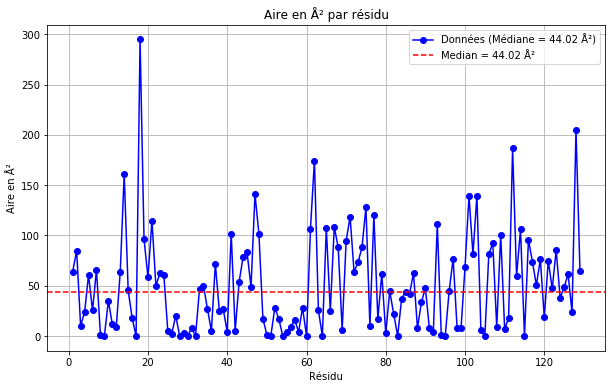

In [17]:
# Calculate the median
median_value = np.median(areas)

# Create the chart
plt.figure(figsize=(10, 6))
plt.plot(residues, areas, marker='o', linestyle='-', color='b', label='Données (Médiane = {:.2f} Å²)'.format(median_value))
plt.axhline(y=median_value, color='r', linestyle='--', label='Median = {:.2f} Å²'.format(median_value))
plt.title('Aire en Å² par résidu')
plt.xlabel('Résidu')
plt.ylabel('Aire en Å²')
plt.grid(True)
plt.legend()

## Second graph

In [18]:
# Read data from file : "resultats_sasa.txt"
residues = []
areas = []

with open("/home/qcapdet/M2BI/GIT_PRJCT/Project_M2BI/OUTPUTS/results_sasa.txt", "r") as file:
    for line in file:
        parts = line.strip().split()
        residue = int(parts[1])
        area = float(parts[-1])
        residues.append(residue)
        areas.append(area)

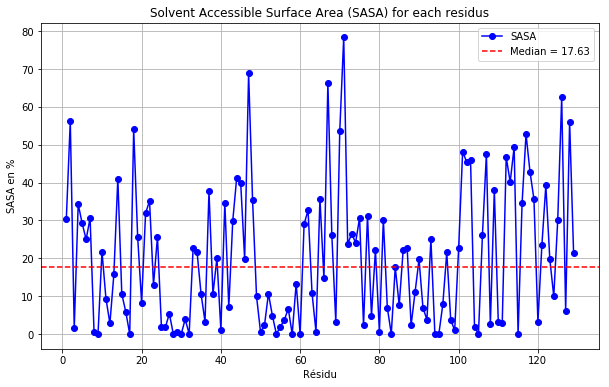

In [19]:
# Calculate the mean and median
mean_value = np.mean(areas)
median_value = np.median(areas)

# Create the graph
plt.figure(figsize=(10, 6))
plt.plot(residues, areas, marker='o', linestyle='-', color='b', label='SASA')
plt.axhline(y=median_value, color='r', linestyle='--', label='Median = {:.2f}'.format(median_value))
plt.title('Solvent Accessible Surface Area (SASA) for each residus')
plt.xlabel('Résidu')
plt.ylabel('SASA en %')
plt.legend()
plt.grid(True)

# Show the mean value in the legend
legend = plt.legend()
legend.get_lines()[1].set_markerfacecolor('r')
legend.get_lines()[1].set_markeredgecolor('r')
legend.get_lines()[1].set_markersize(10)
legend.get_lines()[1].set_linestyle('--')

## Third graph

In [50]:
# Liste des noms de fichiers à superposer
file_names = ["OUTPUTS/results_area_20.txt", "OUTPUTS/results_area_50.txt", "OUTPUTS/results_area.txt", "OUTPUTS/results_area_300.txt", "OUTPUTS/results_area_500.txt", "OUTPUTS/results_area_1000.txt"]
# Initialiser une liste pour stocker les médianes de chaque fichier
medians = []

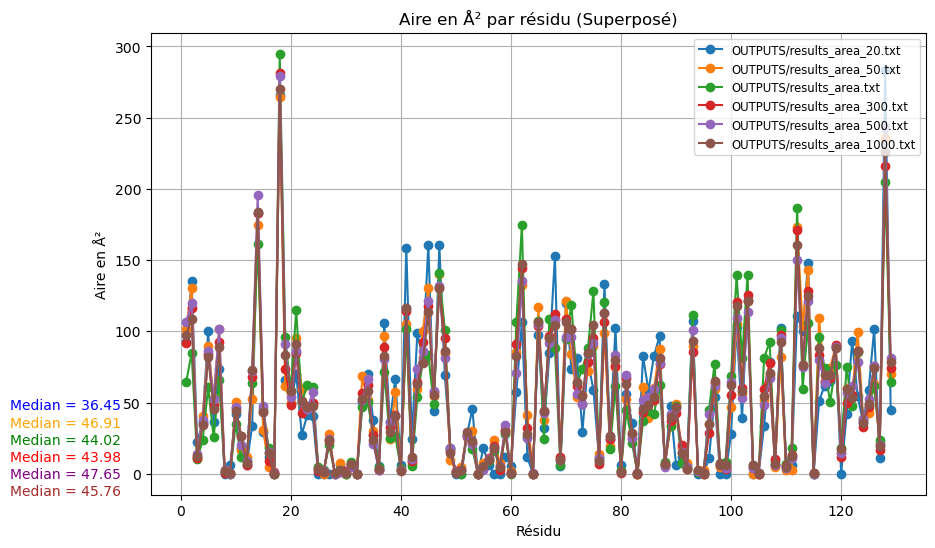

In [51]:
# Create the plot
plt.figure(figsize=(10, 6))

# Loop to read and overlay data from each file
for file_name in file_names:
    residues = []
    areas = []

    with open(file_name, "r") as file:
        for line in file:
            parts = line.strip().split()
            residue = int(parts[1])
            area = float(parts[-1])
            residues.append(residue)
            areas.append(area)

    plt.plot(residues, areas, marker='o', linestyle='-', label=file_name)

    # Calculate and add the median to the list
    median = np.median(areas)
    medians.append(median)

# Calculate the overall median
global_median = np.median(medians)

# Titles and labels
plt.title('Aire en Å² par résidu (Superposé)')
plt.xlabel('Résidu')
plt.ylabel('Aire en Å²')
plt.grid(True)

# Show the plot
plt.legend(loc='upper right', fontsize='small')

# Add median values on the left side, spaced based on the legend
legend_labels = [label.get_text() for label in plt.gca().get_legend().get_texts()]
colors = ['b', 'orange', 'g', 'r', 'purple', 'brown']

for i, label in enumerate(legend_labels):
    plt.text(-31, global_median - i * 12, 'Median = {:.2f}'.format(medians[i]), color=colors[i])


## Performance test results : 

In [54]:
# Open files 1 and 2 for reading
with open("OUTPUTS/Results_website.txt", "r") as file1, open("OUTPUTS/results_area.txt", "r") as file2:
    lines_file1 = file1.readlines()
    lines_file2 = file2.readlines()

# Check if the files have the same number of lines
if len(lines_file1) != len(lines_file2):
    print("The files do not have the same number of lines.")
else:
    total_percentage_difference = 0
    count = 0
    
    for i in range(len(lines_file1)):
        # Read the value from file 1 (column 5)
        value_file1 = float(lines_file1[i].split()[5])

        # Read the value from file 2 (last column)
        value_file2 = float(lines_file2[i].split()[-1])

        # Calculate the difference between the values
        difference = value_file1 - value_file2

        # Calculate the percentage difference
        if value_file2 != 0:
            percentage_difference = round(abs((difference / value_file2) * 100))
        else:
            percentage_difference = 0
        
        # Add the percentage difference to the total
        total_percentage_difference += percentage_difference

        # Increment the counter
        count += 1

        # Display results for each pair of lines
        print("  Percentage difference:", percentage_difference, "%")
        
# Calculate the average percentage difference
if count > 0:
    average_percentage_difference = total_percentage_difference / count
else:
    average_percentage_difference = 0

# Display the average
print("Average percentage difference:", round(average_percentage_difference))

  Percentage difference: 40 %
  Percentage difference: 27 %
  Percentage difference: 2 %
  Percentage difference: 74 %
  Percentage difference: 28 %
  Percentage difference: 79 %
  Percentage difference: 25 %
  Percentage difference: 100 %
  Percentage difference: 0 %
  Percentage difference: 39 %
  Percentage difference: 45 %
  Percentage difference: 100 %
  Percentage difference: 40 %
  Percentage difference: 11 %
  Percentage difference: 13 %
  Percentage difference: 108 %
  Percentage difference: 0 %
  Percentage difference: 85 %
  Percentage difference: 4 %
  Percentage difference: 21 %
  Percentage difference: 21 %
  Percentage difference: 39 %
  Percentage difference: 28 %
  Percentage difference: 21 %
  Percentage difference: 49 %
  Percentage difference: 81 %
  Percentage difference: 18 %
  Percentage difference: 0 %
  Percentage difference: 100 %
  Percentage difference: 0 %
  Percentage difference: 100 %
  Percentage difference: 0 %
  Percentage difference: 22 %
  Percentage